In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/sample_data

/content/sample_data


In [ ]:
!unzip -qq "/content/drive/MyDrive/Colab Notebooks/datasets/new.zip"

In [ ]:
import os
import shutil

file_path = "/content/sample_data/split_data"
if os.path.exists(file_path):
  shutil.rmtree(file_path)

In [ ]:
import os, shutil, pathlib

### split

#### train

In [ ]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

createFolder('/content/sample_data/split_data')

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

createFolder('/content/sample_data/split_data/train')

for i in range(1,6):
  # 결과 저장 폴더 생성
  out_dir =f"/content/sample_data/split_data/train/{i}"
  if out_dir not in os.listdir():
      os.mkdir(out_dir)

In [ ]:
def make_subset(start_index, end_index):
  for category in range(1,6):
    original_dir = pathlib.Path(f"/content/sample_data/new/{category}")
    dir = pathlib.Path(f"/content/sample_data/split_data/train/{category}")
    fnames = [f'{category}_{i}.jpg' for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src = original_dir /fname,
                      dst = dir / fname)

In [ ]:
make_subset(start_index = 1, end_index = 31)
make_subset(start_index = 51, end_index = 81)

#### valid

In [ ]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

createFolder('/content/sample_data/split_data')

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

createFolder('/content/sample_data/split_data/valid')

for i in range(1,6):
  # 결과 저장 폴더 생성
  out_dir =f"/content/sample_data/split_data/valid/{i}"
  if out_dir not in os.listdir():
      os.mkdir(out_dir)

In [ ]:
def make_subset(start_index, end_index):
  for category in range(1,6):
    original_dir = pathlib.Path(f"/content/sample_data/new/{category}")
    dir = pathlib.Path(f"/content/sample_data/split_data/valid/{category}")
    fnames = [f'{category}_{i}.jpg' for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src = original_dir /fname,
                      dst = dir / fname)

In [ ]:
make_subset(start_index = 31, end_index = 41)
make_subset(start_index = 81, end_index = 91)

#### test

In [ ]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

createFolder('/content/sample_data/split_data')

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

createFolder('/content/sample_data/split_data/test')

for i in range(1,6):
  # 결과 저장 폴더 생성
  out_dir =f"/content/sample_data/split_data/test/{i}"
  if out_dir not in os.listdir():
      os.mkdir(out_dir)

In [ ]:
def make_subset(start_index, end_index):
  for category in range(1,6):
    original_dir = pathlib.Path(f"/content/sample_data/new/{category}")
    dir = pathlib.Path(f"/content/sample_data/split_data/test/{category}")
    fnames = [f'{category}_{i}.jpg' for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src = original_dir /fname,
                      dst = dir / fname)

In [ ]:
make_subset(start_index = 41, end_index = 51)
make_subset(start_index = 91, end_index = 101)

### 증강

### 모델링

In [ ]:
train_dir = '/content/sample_data/split_data/train'
valid_dir = '/content/sample_data/split_data/valid'
test_dir  = '/content/sample_data/split_data/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (250, 250),
                  batch_size = 20,
                  class_mode = 'categorical')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (250, 250),
                  batch_size = 10,
                  class_mode = 'categorical')

Found 300 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 250, 250, 3)
배치 레이블 크기: (20, 5)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (250, 250, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(5, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 124, 124, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 61, 61, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 29, 29, 128)     

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 15,
                       epochs = 50,
                       validation_data = valid_generator,
                       validation_steps = 10)

Epoch 1/50
15/15 [==============================] - 91s 6s/step - loss: 1.2749 - accuracy: 0.5567 - val_loss: 0.0922 - val_accuracy: 1.0000
Epoch 2/50
15/15 [==============================] - 86s 6s/step - loss: 0.0221 - accuracy: 1.0000 - val_loss: 7.7552e-04 - val_accuracy: 1.0000
Epoch 3/50
15/15 [==============================] - 87s 6s/step - loss: 2.0408e-04 - accuracy: 1.0000 - val_loss: 2.8438e-04 - val_accuracy: 1.0000
Epoch 4/50
15/15 [==============================] - 85s 6s/step - loss: 2.0964e-05 - accuracy: 1.0000 - val_loss: 9.7200e-04 - val_accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 88s 6s/step - loss: 1.5430e-06 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 90s 6s/step - loss: 6.9141e-07 - accuracy: 1.0000 - val_loss: 7.3238e-04 - val_accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 85s 6s/step - loss: 4.8002e-07 - accuracy: 1.0000 - val_loss: 5.0533e-04 - v

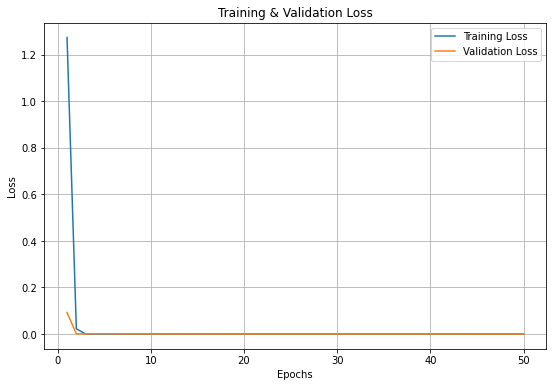

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

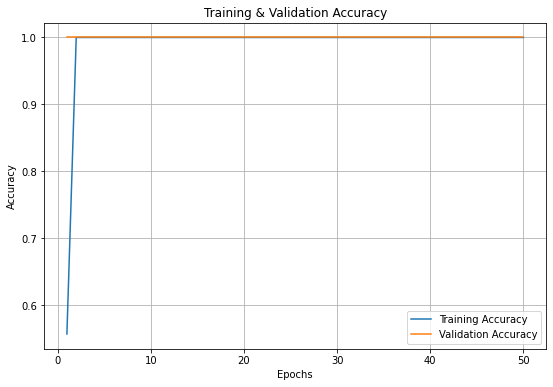

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (75, 75),
                 batch_size = 10,
                 class_mode = 'categorical')

Found 100 images belonging to 5 classes.


In [ ]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 10)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

In [ ]:
test_image = "/content/cut_9.png"

from PIL import Image
import numpy as np

img = Image.open(test_image)
img = img.resize((250,250))
data = np.asarray(img)
X = np.array(data)
X = X.astype("float") / 256
X = X.reshape(-1,250,250,3)

# 예측
pred = model.predict(X)  
result = [np.argmax(value) for value in pred]   # 예측 값 중 가장 높은 클래스 반환

print(result[0])

1/1 [==============================] - 0s 71ms/step
0


In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/models/pill_model.h5')